# Recreation of the gen Pt of dark Photon from the Analysis note (Figure 3)

## Here we are using two methods to plot the graphs. One is the straight forward way where we process each data file one at a time. Another is by using the interface called 'runner', which allows processing of multiple data at a time

### First we are importing all the packages required

In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities) 

<module 'sidm.tools.utilities' from '/home/cms-jovyan/SIDM/sidm/studies/../../sidm/tools/utilities.py'>

### plotting style defined as cms style 

In [2]:

plt.style.use(hep.style.CMS)

### Following are the 6 different root files used in the first method of processing

In [3]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
sample_name1 = "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4"
sample_name2 = "SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7"
sample_name3 = "SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2"
sample_name4 = "SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8"
sample_name5 = "SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5"
sample_name6 = "SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4"
sample_file1 = f"{sample_dir}/{sample_name1}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155809/0000/ffNtuple_1.root"
sample_file2 = f"{sample_dir}/{sample_name2}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155637/0000/ffNtuple_1.root"
sample_file3 = f"{sample_dir}/{sample_name3}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155722/0000/ffNtuple_1.root"
sample_file4 = f"{sample_dir}/{sample_name4}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_160450/0000/ffNtuple_1.root"
sample_file5 = f"{sample_dir}/{sample_name5}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_153128/0000/ffNtuple_1.root"
sample_file6 = f"{sample_dir}/{sample_name6}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_154240/0000/ffNtuple_1.root"




### Generate the events from each root file one by one

In [4]:
events1 = NanoEventsFactory.from_root(
    sample_file1,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset": sample_name1, 
    },
).events()
events2 = NanoEventsFactory.from_root(
    sample_file2,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset": sample_name2, 
    },
).events()
events3 = NanoEventsFactory.from_root(
    sample_file3,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset": sample_name3, 
    },
).events()
events4 = NanoEventsFactory.from_root(
    sample_file4,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset": sample_name4, 
    },
).events()
events5 = NanoEventsFactory.from_root(
    sample_file5,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset": sample_name5, 
    },
).events()
events6 = NanoEventsFactory.from_root(
    sample_file6,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset": sample_name6, 
    },
).events()


### Define the sidm processor object and pass each event set to them

In [5]:
channels = ["2mu2e", "4mu", "base", "noLjPtCut"]
hists = ["base_plus_gen"]
p1 = sidm_processor.SidmProcessor([channels[0]], hists)

out1 = p1.process(events1)
out2 = p1.process(events2)
out3 = p1.process(events3)

out4 = p1.process(events4)
out5 = p1.process(events5)
out6 = p1.process(events6)




### Plotting the dark photon Pt graph for each cases mentioned the Analysis note. In the analysis note we can see that the mass of the dark photon is kept at 5 Gev and the dark matter bound state is varying from 100 GeV to 1000GeV. Also the decay length at the lab frame is kept constant . ie l_xy =3mm( correct me if I am wrong) 

Text(0, 1, 'counts')

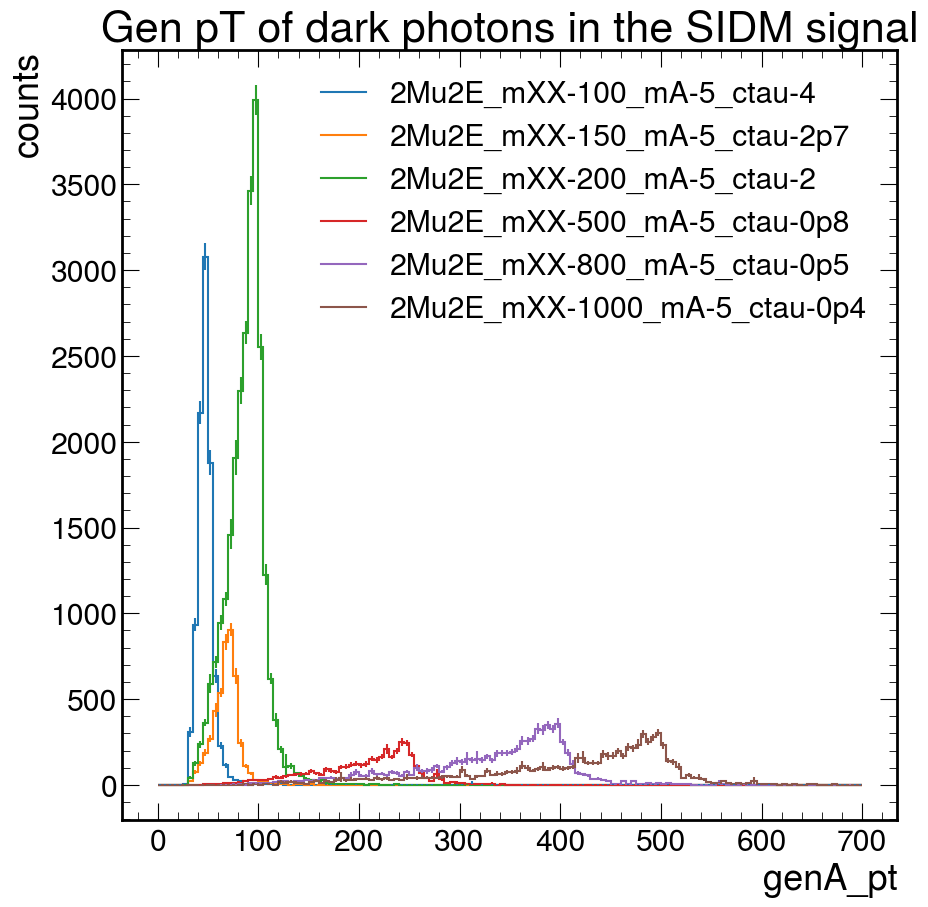

In [6]:
ch = channels[0]
out1[sample_name1]["hists"]["genA_pt_highRange"][ch, :].plot()
out2[sample_name2]["hists"]["genA_pt_highRange"][ch, :].plot()
out3[sample_name3]["hists"]["genA_pt_highRange"][ch, :].plot()

out4[sample_name4]["hists"]["genA_pt_highRange"][ch, :].plot()
out5[sample_name5]["hists"]["genA_pt_highRange"][ch, :].plot()
out6[sample_name6]["hists"]["genA_pt_highRange"][ch, :].plot()
plt.legend(["2Mu2E_mXX-100_mA-5_ctau-4", "2Mu2E_mXX-150_mA-5_ctau-2p7", 
            "2Mu2E_mXX-200_mA-5_ctau-2","2Mu2E_mXX-500_mA-5_ctau-0p8",
            "2Mu2E_mXX-800_mA-5_ctau-0p5","2Mu2E_mXX-1000_mA-5_ctau-0p4"])
plt.title("Gen pT of dark photons in the SIDM signal")
plt.ylabel("counts")


### Density plot for Gen Pt. Here I am using the default normalisation from the matplotlib 

Text(0, 1, '')

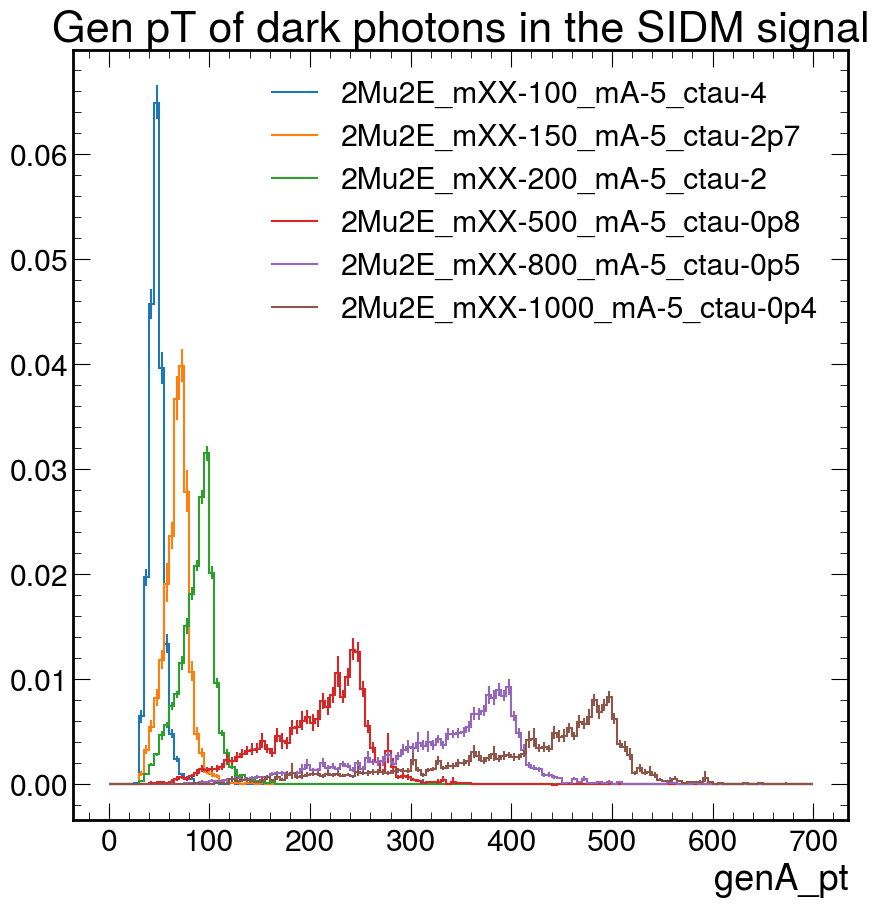

In [7]:
hep.histplot(out1[sample_name1]["hists"]["genA_pt_highRange"]["2mu2e",:], density=True)
hep.histplot(out2[sample_name2]["hists"]["genA_pt_highRange"]["2mu2e",:], density=True)
hep.histplot(out3[sample_name3]["hists"]["genA_pt_highRange"]["2mu2e",:], density=True)
hep.histplot(out4[sample_name4]["hists"]["genA_pt_highRange"]["2mu2e",:], density=True)
hep.histplot(out5[sample_name5]["hists"]["genA_pt_highRange"]["2mu2e",:], density=True)
hep.histplot(out6[sample_name6]["hists"]["genA_pt_highRange"]["2mu2e",:], density=True)
plt.legend(["2Mu2E_mXX-100_mA-5_ctau-4", "2Mu2E_mXX-150_mA-5_ctau-2p7", 
            "2Mu2E_mXX-200_mA-5_ctau-2","2Mu2E_mXX-500_mA-5_ctau-0p8",
            "2Mu2E_mXX-800_mA-5_ctau-0p5","2Mu2E_mXX-1000_mA-5_ctau-0p4"])
plt.title("Gen pT of dark photons in the SIDM signal")
plt.ylabel("")


##Repeating the same Pt plot using the runner method. Here I am including more ntuples available for each dark matter mass from the repositoy repository. 

In [8]:
samples = [
    "2Mu2E_100GeV_5GeV_4mm",
    "2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_5GeV_2mm",
    "2Mu2E_500GeV_5GeV_0p8mm",
    "2Mu2E_800GeV_5GeV_0p5mm",
    "2Mu2E_1000GeV_5GeV_0p4mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [9]:

ch = "2mu2e"
runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e",
        
        
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)



Output()

Output()

In [10]:
### Plotting the same Pt graph from above

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f300d1c1a60>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

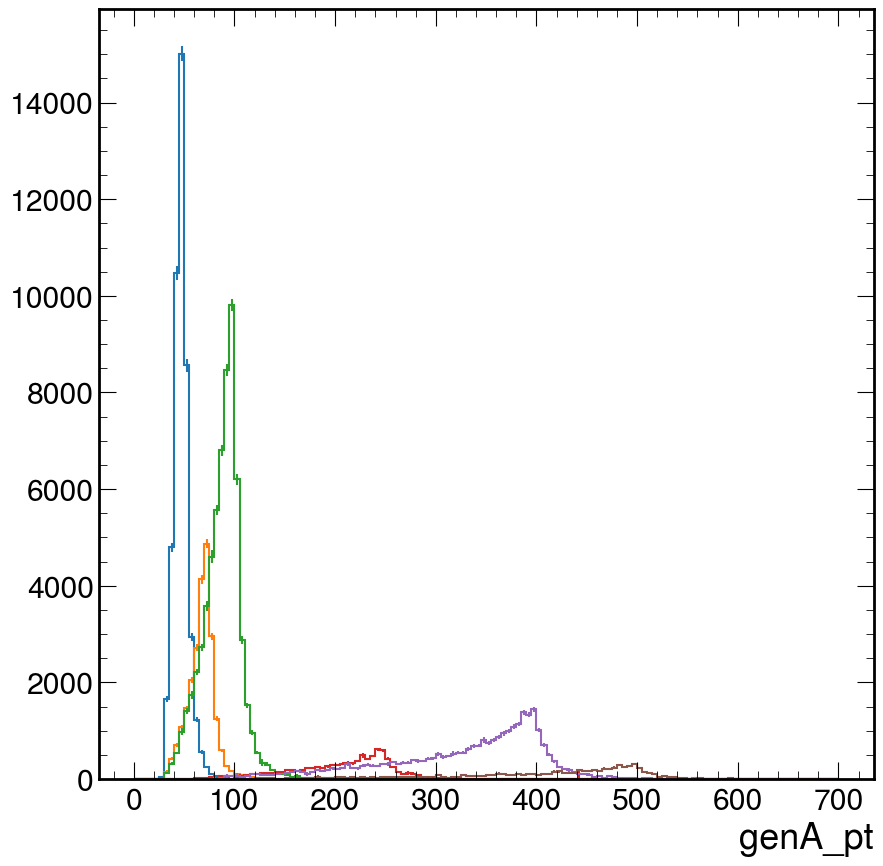

In [11]:
output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genA_pt_highRange"][ch,:].plot()
output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genA_pt_highRange"][ch,:].plot()
output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genA_pt_highRange"][ch,:].plot()
output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genA_pt_highRange"][ch,:].plot()
output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genA_pt_highRange"][ch,:].plot()
output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genA_pt_highRange"][ch,:].plot()


In [12]:
### Density Hiistogram 

Text(0, 1, '')

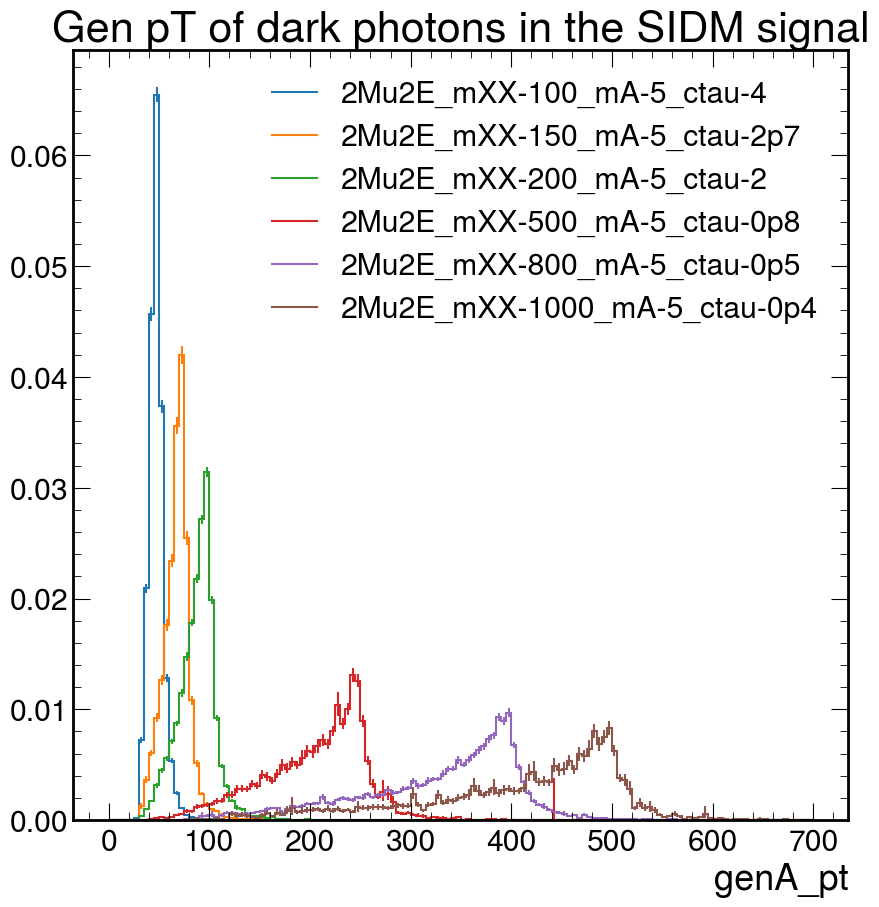

In [13]:
hep.histplot(output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genA_pt_highRange"]["2mu2e",:], density=True)
hep.histplot(output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genA_pt_highRange"]["2mu2e",:], density=True)
hep.histplot(output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genA_pt_highRange"]["2mu2e",:], density=True)
hep.histplot(output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genA_pt_highRange"]["2mu2e",:], density=True)
hep.histplot(output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genA_pt_highRange"]["2mu2e",:], density=True)
hep.histplot(output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genA_pt_highRange"]["2mu2e",:], density=True)
plt.legend(["2Mu2E_mXX-100_mA-5_ctau-4", "2Mu2E_mXX-150_mA-5_ctau-2p7", 
            "2Mu2E_mXX-200_mA-5_ctau-2","2Mu2E_mXX-500_mA-5_ctau-0p8",
            "2Mu2E_mXX-800_mA-5_ctau-0p5","2Mu2E_mXX-1000_mA-5_ctau-0p4"])
plt.title("Gen pT of dark photons in the SIDM signal")
plt.ylabel("")

### Using the utilities for plotting

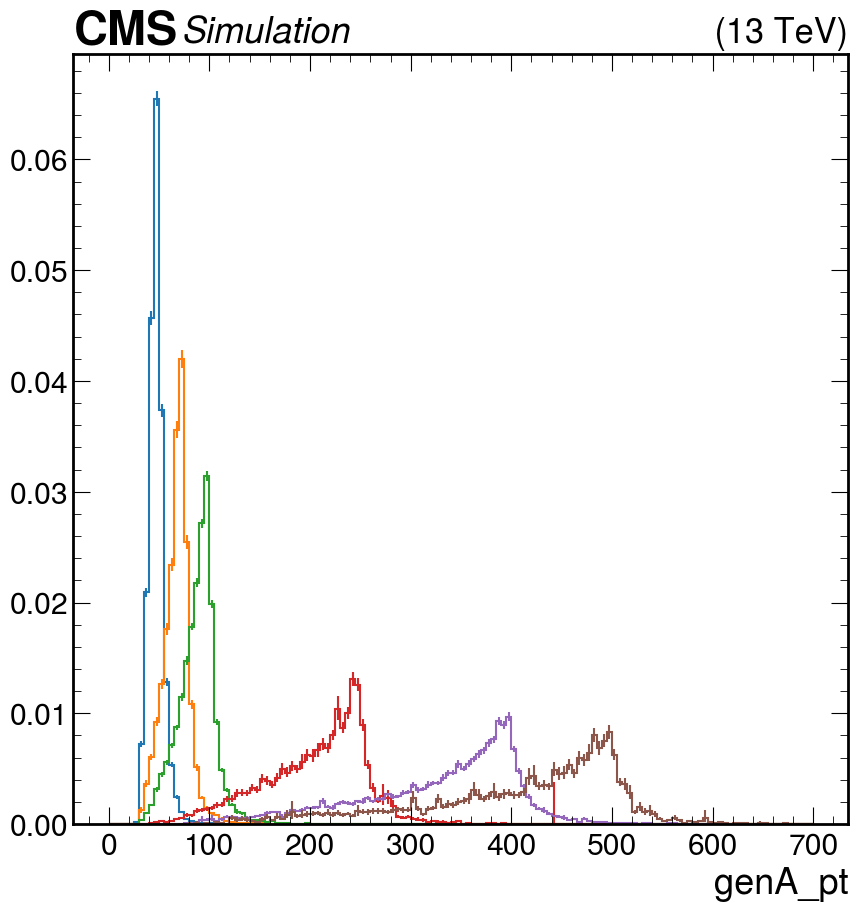

In [14]:
utilities.plot([output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genA_pt_highRange"][ch,:],
                output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genA_pt_highRange"][ch,:],
                output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genA_pt_highRange"][ch,:],
                output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genA_pt_highRange"][ch,:],
                output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genA_pt_highRange"][ch,:],
                output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genA_pt_highRange"][ch,:]], density=True)

#### 

### Observations from the plot:
#### 1) The graph follows same shape as in the analysis note.
#### 2) Since the mass of the dark photon is neglible (5GeV) compared to that of the dark matter, and there is two dark photons, the peak of the histogram 
#### should be around half of dark matter bound state mass. That is what we are seeing in this plot.
#### 3) The frequecy we get is not exactly match as of the analysis note. I still need to figure out the normalisation used in those plots.